In [36]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [37]:
from sklearn.ensemble import RandomForestClassifier


In [38]:
dfOS = pd.read_csv("BWB-BCSB-openspecimen_consent.matrix.csv")
dfOS.head()

,Participant_PPID,Visit_Event Label,Baseline_Date,Time_From_Baseline_Days,Time_From_Consent_Days,Interval_Days,Visit_Type,Primary_Visit_Type,Visit_Event Labels,Collection_Dates,EarliestConsentDate,Time_From_Baseline_Dayss,Time_From_Consent_Dayss,Interval_Dayss,Has_Baseline,Has_Y1,Has_Y2,Visit_TypeCOMB,Primary_Visit
0,1,Baseline,2022-05-25T18:00:00Z,0.750000,0.750000,0.750000,Baseline Only,Baseline,"Baseline, Y2 Follow Up","2022-05-25 11:00:00, 2024-10-09 10:46:00",2022-05-25,"0, 867.990277777778","0.75, 868.740277777778","0, 867.990277777778",True,False,True,Baseline + Y2,Other
1,1,Y2 Follow Up,2022-05-25T18:00:00Z,867.990278,868.740278,867.990278,Y2 Only,Y2 Follow Up,"Baseline, Y2 Follow Up","2022-05-25 11:00:00, 2024-10-09 10:46:00",2022-05-25,"0, 867.990277777778","0.75, 868.740277777778","0, 867.990277777778",True,False,True,Baseline + Y2,Other
2,3,Baseline,2022-05-31T17:45:00Z,0.739583,0.739583,0.739583,Baseline Only,Baseline,"Baseline, Y1 Follow Up, Y2 Follow Up","2022-05-31 10:45:00, 2023-07-05 08:06:00, 2024...",2022-05-31,"0, 399.889583333333, 876.954861111111","0.739583333333333, 400.629166666667, 877.69444...","0, 399.889583333333, 477.065277777778",True,True,True,Baseline + Y1 + Y2,Y2 Follow Up
3,3,Y1 Follow Up,2022-05-31T17:45:00Z,399.889583,400.629167,399.889583,Y1 Only,Y1 Follow Up,"Baseline, Y1 Follow Up, Y2 Follow Up","2022-05-31 10:45:00, 2023-07-05 08:06:00, 2024...",2022-05-31,"0, 399.889583333333, 876.954861111111","0.739583333333333, 400.629166666667, 877.69444...","0, 399.889583333333, 477.065277777778",True,True,True,Baseline + Y1 + Y2,Y2 Follow Up
4,3,Y2 Follow Up,2022-05-31T17:45:00Z,876.954861,877.694444,477.065278,Y2 Only,Y2 Follow Up,"Baseline, Y1 Follow Up, Y2 Follow Up","2022-05-31 10:45:00, 2023-07-05 08:06:00, 2024...",2022-05-31,"0, 399.889583333333, 876.954861111111","0.739583333333333, 400.629166666667, 877.69444...","0, 399.889583333333, 477.065277777778",True,True,True,Baseline + Y1 + Y2,Y2 Follow Up


In [39]:
dfCE = pd.read_csv("BWB-BCSB-consented-enroll.matrix.csv")
dfCE.head()

,ID,ConsentSigned,SurveyStatus,BloodDrawStatus,WhatisyourRaceEthnicity,ExternalRecordsRequestStatus,ExternalRecordsDataEntryStatus,Race,location,edu,survey
0,BCSB0001,Yes,Completed,Completed,White,Received,Complete,White,Web,College graduate or beyond,Completed
1,BCSB0003,Yes,Completed,Completed,White,Received,Complete,White,Web,College graduate or beyond,Completed
2,BCSB0004,Yes,Completed,Completed,Hispanic or Latino,Received,Complete,Hispanic or Latino,Web,College graduate or beyond,Completed
3,BCSB0006,Yes,Completed,Completed,White,Received,Complete,White,Web,College graduate or beyond,Completed
4,BCSB0008,Yes,Completed,Completed,Asian,Received,Complete,Asian,Web,College graduate or beyond,Completed


In [40]:
dfCRF = pd.read_csv("BWB-BCSB-clind_subtype_unconsolidated.matrix.csv")
dfCRF.head()

,StudyID,InsuranceEnrollment,OtherInsurance,Height,Weight,BMI,HasBenignBreastDisease,BenignBreastDisease,BenignBreastDiseaseDiagnosisDate,BenignBreastDiseaseComments,...,SurgicalMargins,SurgicalHistoryComments,OncotypeDXScore2,MammaprintScore,PDL1Status,GuardantTestingID,NGSTestingID,SignateraTestID,OtherMolecularTest,RS2
0,BCSB0001,NaN,Blue Cross PPO,180.3,98.9,30.4,No,NaN,NaN,NaN,...,0.6,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,"ER+, HER2-, PR-"
1,BCSB0003,NaN,NaN,170.2,113.4,39.1,Yes,Fibrocystic Breast Changes,8/24/2018,Right,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ER-, HER2-, PR-"
2,BCSB0004,NaN,Kaiser Foundation Health Plan,165.1,79.3,29.1,No,NaN,NaN,NaN,...,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ER-, HER2+, PR-"
3,BCSB0006,NaN,NaN,154.9,59.9,25.0,No,NaN,NaN,NaN,...,0.5,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,"ER+, HER2-, PR+"
4,BCSB0008,NaN,NaN,160.0,77.5,30.3,Yes,Adenosis,10/4/2017,Right,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ER+, HER2-, PR+"


In [41]:
dfDx = pd.read_csv("BWB-BCSB-enrolled-diagnosis_date.matrix.csv")
dfDx.head()

,Participant_PPID,Visit_Event Label,Baseline_Date,Time_From_Baseline_Days,Time_From_Consent_Days,Interval_Days,Visit_Type,Primary_Visit_Type,Visit_Event Labels,Collection_Dates,...,HER2_Pos,ER_Neg,PR_Neg,HER2_Neg,RS3,diagnosisdate,Days.since.Dx,Years.since.Dx,Years.since.Dx2,lab
0,BCSB0001,Baseline,2022-05-25T18:00:00Z,0.750000,0.750000,0.750000,Baseline Only,Baseline,"Baseline, Y2 Follow Up","2022-05-25 11:00:00, 2024-10-09 10:46:00",...,False,False,True,True,HR+/HER2-,2019-05-01,1120,3,3,3 YEARS
1,BCSB0001,Y2 Follow Up,2022-05-25T18:00:00Z,867.990278,868.740278,867.990278,Y2 Only,Y2 Follow Up,"Baseline, Y2 Follow Up","2022-05-25 11:00:00, 2024-10-09 10:46:00",...,False,False,True,True,HR+/HER2-,2019-05-01,1120,3,3,3 YEARS
2,BCSB0003,Baseline,2022-05-31T17:45:00Z,0.739583,0.739583,0.739583,Baseline Only,Baseline,"Baseline, Y1 Follow Up, Y2 Follow Up","2022-05-31 10:45:00, 2023-07-05 08:06:00, 2024...",...,False,True,True,True,Triple Negative,2018-08-24,1376,3,3,3 YEARS
3,BCSB0003,Y1 Follow Up,2022-05-31T17:45:00Z,399.889583,400.629167,399.889583,Y1 Only,Y1 Follow Up,"Baseline, Y1 Follow Up, Y2 Follow Up","2022-05-31 10:45:00, 2023-07-05 08:06:00, 2024...",...,False,True,True,True,Triple Negative,2018-08-24,1376,3,3,3 YEARS
4,BCSB0003,Y2 Follow Up,2022-05-31T17:45:00Z,876.954861,877.694444,477.065278,Y2 Only,Y2 Follow Up,"Baseline, Y1 Follow Up, Y2 Follow Up","2022-05-31 10:45:00, 2023-07-05 08:06:00, 2024...",...,False,True,True,True,Triple Negative,2018-08-24,1376,3,3,3 YEARS


In [42]:
dfDx.shape

(704, 103)

In [53]:
dfT = pd.read_csv("/Users/red/Downloads/HS2100716BodourSalhi-TimeMeasures_DATA_2025-08-07_1149.csv")
dfT.head()

,record_id,redcap_event_name,redcap_survey_identifier,bcsbusername,baseline_arm_1_studyid,clinic,consentsignedtracker,baselinesurveystatus,surveycompletedtcheck,baselineblooddrawstatus,...,demographics_spanish_timestamp,demo_race_sp,ethnicity,demo_highesteducation_sp,birthdate,residence_history_timestamp,currentcity,currentstate,fedexshipid,fedexshipid_2
0,1,baseline_arm_1,NaN,BCSB0001,NaN,NaN,1.0,3.0,2022-05-25,1.0,...,NaN,NaN,6.0,NaN,1967-09-01,2022-05-25 11:41:14,Huntington Beach,CA,NaN,NaN
1,1,year_1_follow_up_arm_1,NaN,NaN,BCSB0001-Y1,NaN,1.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.811750e+11,796670298573
2,3,baseline_arm_1,NaN,BCSB0003,NaN,NaN,1.0,3.0,2022-05-31,1.0,...,NaN,NaN,6.0,NaN,1977-11-25,2022-05-31 10:50:22,San Pedro,California,NaN,NaN
3,3,year_1_follow_up_arm_1,NaN,NaN,BCSB0003-Y1,NaN,1.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.724679e+11,791367030737
4,4,baseline_arm_1,NaN,BCSB0004,NaN,NaN,1.0,3.0,NaN,1.0,...,NaN,NaN,4.0,NaN,1979-09-12,2022-07-28 18:08:51,Brea,Ca,7.701755e+11,791303345391


In [43]:
#Counts of null values 
na_df=pd.DataFrame(dfDx.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,B,704
1,CarcinomaDiagnosis,704
2,InsuranceEnrollment,704
3,NGSTestingID,704
4,RecurrenceSite_,702
5,PDL1Status,702
6,GuardantTestingID,702
7,SignateraTestID,697
8,RecurrenceDate,692
9,RecurrenceComments,691


In [44]:
dfDx = dfDx.dropna(axis=1)


In [45]:
dfDx.shape

(704, 46)

In [46]:
dfDx.isnull().sum()


Participant_PPID             0
Visit_Event Label            0
Baseline_Date                0
Time_From_Baseline_Days      0
Time_From_Consent_Days       0
Interval_Days                0
Visit_Type                   0
Primary_Visit_Type           0
Visit_Event Labels           0
Collection_Dates             0
EarliestConsentDate.x        0
Time_From_Baseline_Dayss     0
Time_From_Consent_Dayss      0
Interval_Dayss               0
Has_Baseline                 0
Has_Y1                       0
Has_Y2                       0
Visit_TypeCOMB               0
Primary_Visit                0
currentstaddr1               0
currentcity                  0
currentstate                 0
currentzip                   0
birthdate                    0
EarliestConsentDate.y        0
BreastCancerDiagnosisDate    0
BreastCancerDiagnosis        0
PathologicalStageT           0
PathologicalStageN           0
RS                           0
ImagingDetailNumber          0
SurgicalHistoryNumber        0
Surgical

In [47]:
print(dfDx.nunique())


Participant_PPID             488
Visit_Event Label              3
Baseline_Date                481
Time_From_Baseline_Days      683
Time_From_Consent_Days       683
Interval_Days                683
Visit_Type                     3
Primary_Visit_Type             3
Visit_Event Labels             4
Collection_Dates             484
EarliestConsentDate.x        321
Time_From_Baseline_Dayss     191
Time_From_Consent_Dayss      484
Interval_Dayss               191
Has_Baseline                   1
Has_Y1                         2
Has_Y2                         2
Visit_TypeCOMB                 4
Primary_Visit                  4
currentstaddr1               488
currentcity                  374
currentstate                 115
currentzip                   431
birthdate                    475
EarliestConsentDate.y        321
BreastCancerDiagnosisDate    417
BreastCancerDiagnosis         16
PathologicalStageT            21
PathologicalStageN            21
RS                            19
ImagingDet

In [48]:
dfDx.describe().T


,count,mean,std,min,25%,50%,75%,max
Time_From_Baseline_Days,704.0,163.697967,202.125898,-44.163194,21.42066,57.15625,318.310069,876.954861
Time_From_Consent_Days,704.0,178.824099,221.619540,-44.163194,21.42066,57.15625,364.802083,900.843750
Interval_Days,704.0,150.334929,171.686107,-44.163194,21.42066,57.15625,316.048958,867.990278
Days.since.Dx,704.0,1139.826705,710.754059,89.000000,572.50000,995.00000,1623.500000,3187.000000
Years.since.Dx,704.0,2.610795,1.989788,0.000000,1.00000,2.00000,4.000000,8.000000


In [49]:
duplicateRowsDF = dfDx[dfDx.duplicated()]
duplicateRowsDF

,Participant_PPID,Visit_Event Label,Baseline_Date,Time_From_Baseline_Days,Time_From_Consent_Days,Interval_Days,Visit_Type,Primary_Visit_Type,Visit_Event Labels,Collection_Dates,...,HER2_Pos,ER_Neg,PR_Neg,HER2_Neg,RS3,diagnosisdate,Days.since.Dx,Years.since.Dx,Years.since.Dx2,lab


In [52]:
dfo = dfDx.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Participant_PPID,488
1,Visit_Event Label,3
2,Baseline_Date,481
3,Visit_Type,3
4,Primary_Visit_Type,3
5,Visit_Event Labels,4
6,Collection_Dates,484
7,EarliestConsentDate.x,321
8,Time_From_Baseline_Dayss,191
9,Time_From_Consent_Dayss,484


Text(0.5, 1.0, 'Correlation Heatmap')

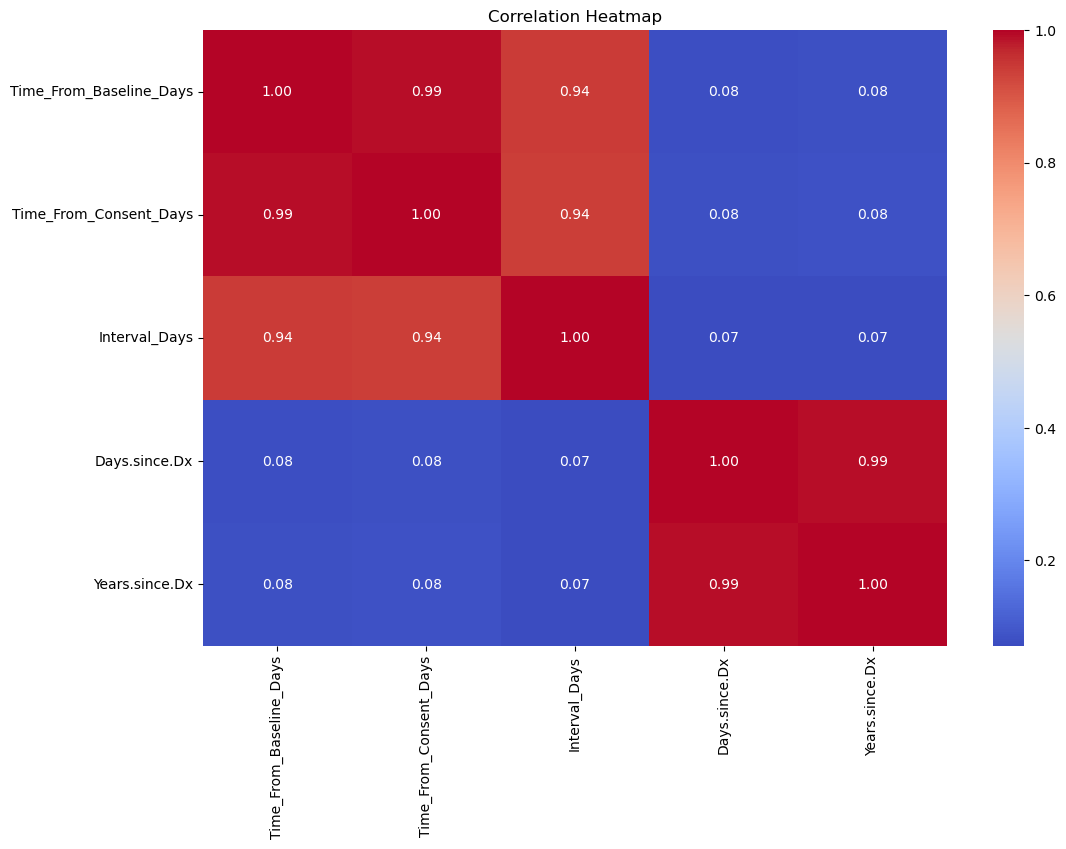

In [51]:
numerical_df = dfDx.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')

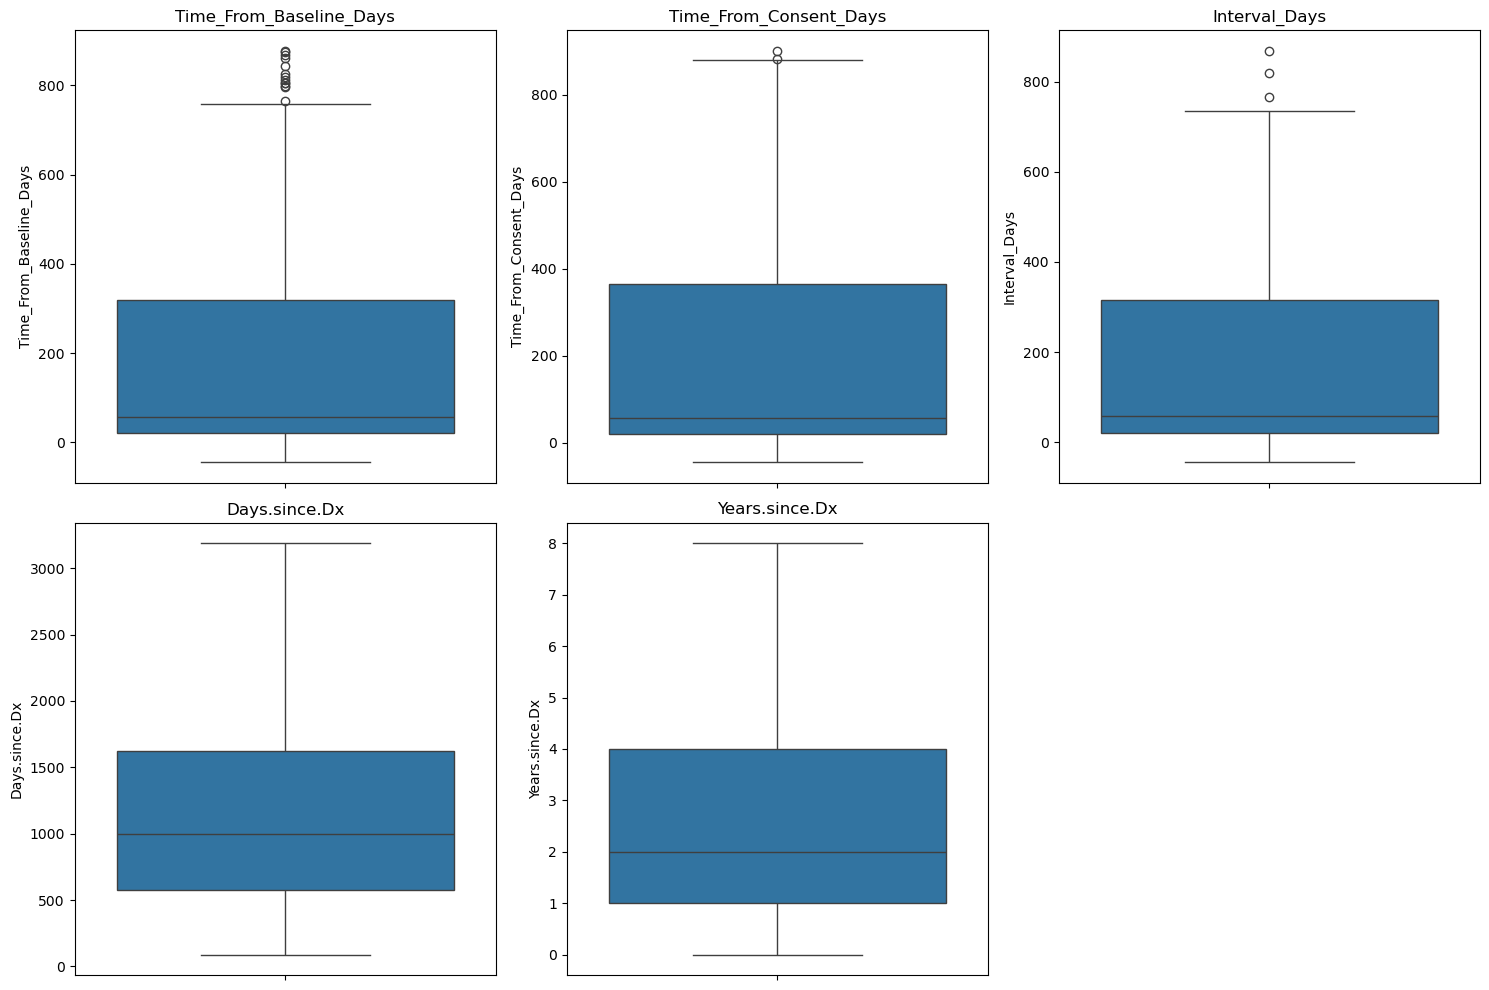

In [30]:
plt.figure(figsize=(15, 10))

# Plotting boxplots for all numerical columns
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(len(numerical_df.columns) // 3 + 1, 3, i)
    sns.boxplot(y=numerical_df[column])
    plt.title(column)

plt.tight_layout()